

# Import Library for Data Cleaning & Preliminary Research

In [1]:
# Importing all relevant libraries to clean and wrangling the dataset
# Data analysis libraries & graphic libraries
import pandas as pd
import numpy as ap
import seaborn as sns
!pip install missingno
!pip install statsmodels
import matplotlib.pyplot as plt
!pip install pyecharts
import pyecharts
from pyecharts.charts import Line,Map,Pie,Bar
import pyecharts.options as opts
try:
    assert pyecharts.__version__ == '1.9.1'
except:
    print(f"pyecharts version should be 1.9.1, your version is {pyecharts.__version__}")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
pd.options.display.max_columns = None

pyecharts version should be 1.9.1, your version is 2.0.3


In [2]:
# Read in the dataset
# Check if the dataset has been imported appropriately
data = pd.read_csv("./Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [3]:
# Count the number of sample population of each race
data['Perceived_Race'].value_counts()

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

In [4]:
# Check what columns is contained in the dataset
data.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

## Descriptive Statistics

In [5]:
# Get the mean & STD of the dataset of each attribute
data.describe().loc[['mean','std']]

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423


In [6]:
data.describe() # all

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [7]:
# Descriptive data exploration of the arrest and strip record based on sex: Female and Male and Unknow
data.groupby(by='Sex').describe()

Arrest_Year                                                         \
          count         mean       std     min     25%     50%     75%   
Sex                                                                      
F       12617.0  2020.513514  0.499837  2020.0  2020.0  2021.0  2021.0   
M       52650.0  2020.509307  0.499918  2020.0  2020.0  2021.0  2021.0   
U           9.0  2020.333333  0.500000  2020.0  2020.0  2020.0  2021.0   

             EventID                                                     \
        max    count          mean           std        min         25%   
Sex                                                                       
F    2021.0  12617.0  1.029868e+06  17396.461456  1000003.0  1014688.00   
M    2021.0  52650.0  1.030028e+06  17299.353010  1000000.0  1015060.25   
U    2021.0      9.0  1.033440e+06  17527.664026  1008713.0  1021410.00   

                                     ArrestID                              \
           50%        75%        max    count          mean           std   
Sex                                                                         
F    1030012.0  1044979.0  1060002.0  12542.0  6.032443e+06  18650.516453   
M    1030003.0  1045001.5  1060002.0  52256.0  6.032392e+06  18721.248860   
U    1039235.0  1046953.0  1057858.0      9.0  6.034686e+06  20173.814171   

                                                             PersonID  \
           min         25%        50%         75%        max    count   
Sex                                                                     
F    6000000.0  6016269.75  6032579.5  6048520.75  6064801.0  12617.0   
M    6000001.0  6016182.75  6032364.5  6048620.25  6064804.0  52650.0   
U    6002463.0  6019345.00  6043493.0  6050222.00  6057934.0      9.0   

                                                                          \
              mean           std       min       25%       50%       75%   
Sex                                                                        
F    318662.857652  10718.537640  300001.0  309614.0  318587.0  327986.0   
M    318585.294131  10838.906800  300000.0  309123.0  318599.5  327914.0   
U    315927.444444   8234.033506  305109.0  313288.0  315849.0  317784.0   

              StripSearch                                               \
          max       count      mean       std  min  25%  50%  75%  max   
Sex                                                                      
F    337335.0     12617.0  0.101688  0.302250  0.0  0.0  0.0  0.0  1.0   
M    337346.0     52650.0  0.123799  0.329355  0.0  0.0  0.0  0.0  1.0   
U    334119.0         9.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

      Booked                                               \
       count      mean       std  min  25%  50%  75%  max   
Sex                                                         
F    12617.0  0.435286  0.495814  0.0  0.0  0.0  1.0  1.0   
M    52650.0  0.539734  0.498423  0.0  0.0  1.0  1.0  1.0   
U        9.0  0.222222  0.440959  0.0  0.0  0.0  0.0  1.0   

    Actions_at_arrest___Concealed_i                                          \
                              count      mean       std  min  25%  50%  75%   
Sex                                                                           
F                           12617.0  0.001664  0.040765  0.0  0.0  0.0  0.0   
M                           52650.0  0.004653  0.068057  0.0  0.0  0.0  0.0   
U                               9.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

         Actions_at_arrest___Combative__                                     \
     max                           count      mean       std  min  25%  50%   
Sex                                                                           
F    1.0                         12617.0  0.044622  0.206481  0.0  0.0  0.0   
M    1.0                         52650.0  0.044008  0.205114  0.0  0.0  0.0   
U    0.0                             9.0  0.111111  0.333333  0.0  

# Data Manipulation and EDA

In [8]:
# Check the dimensions of the dataframe
data.shape

(65276, 25)

In [9]:
# Prints a concise summary of a pandas dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

## EDA of dataset

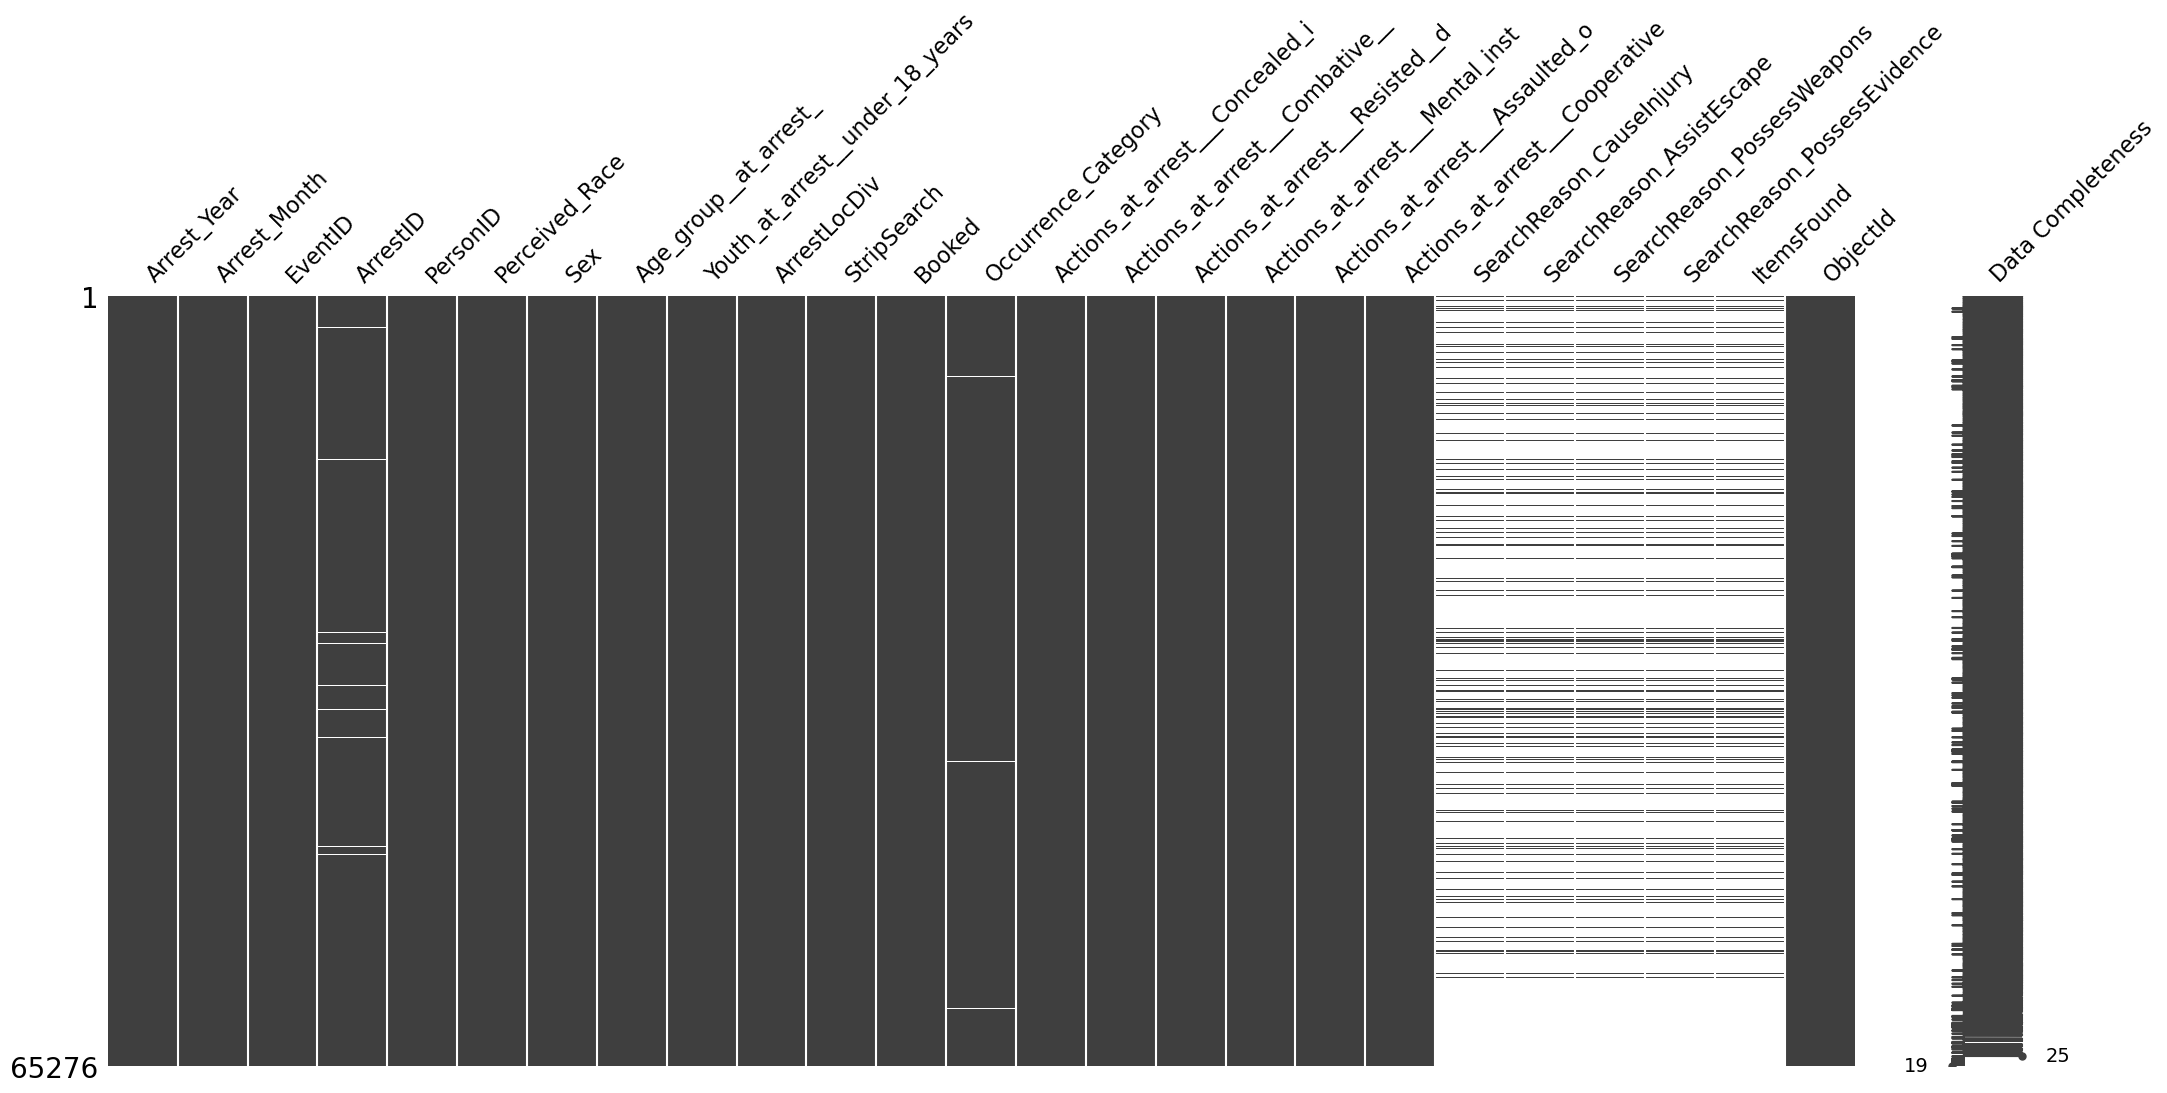

In [10]:
# Statistics of missing value for data
#Visualize Missing Vlaues(NaN) in dataframe
import missingno as mso
mso.matrix(data, labels=True) 
#Display the figures
plt.show()
# SearchReason_CauseInjury      
# SearchReason_AssistEscape        
# SearchReason_PossessWeapons      
# SearchReason_PossessEvidence    
# ItemsFound             
# Has many missing values

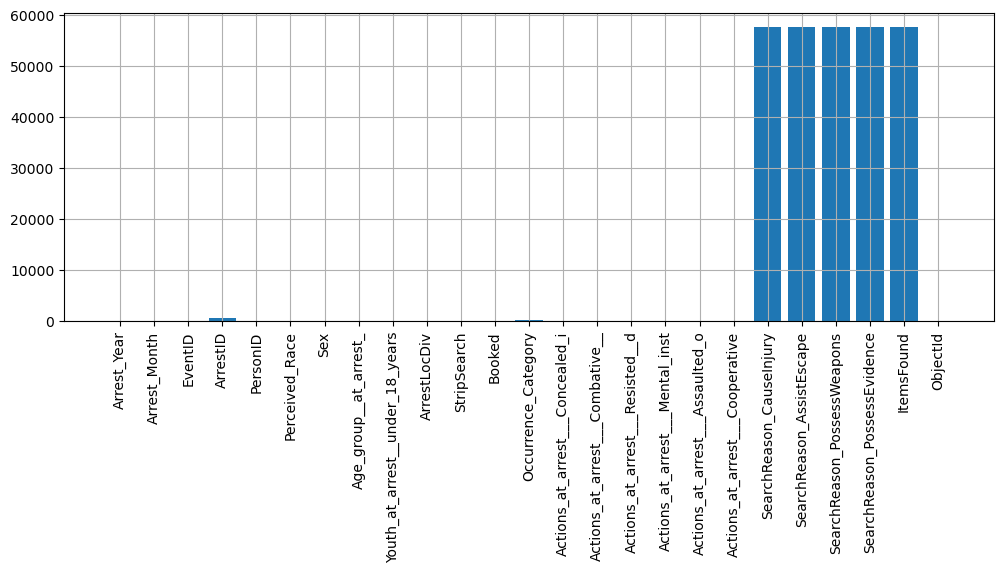

In [11]:
# More intuitive visualization of the number of missing values per column
# Visual Dislay of quantity of missing value per column
null = data.isnull().sum()
plt.figure(figsize=(12,4), dpi=100)
plt.bar(null.index, null)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [12]:
# Count the frequency of uqique values in the sex
c = data['StripSearch'].value_counts()
c

0    57475
1     7801
Name: StripSearch, dtype: int64

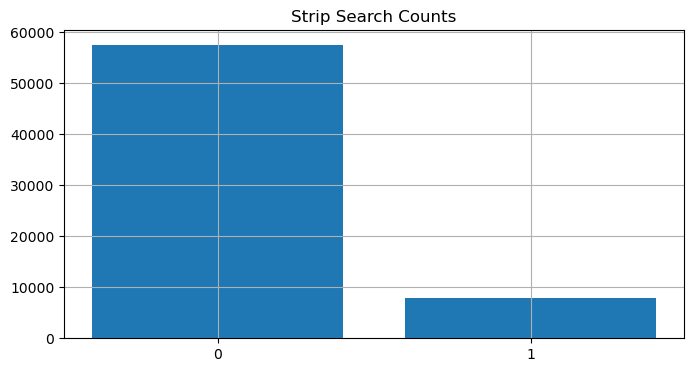

In [13]:
plt.figure(figsize=(8,4), dpi=100)
plt.bar(c.index.astype(str), c)
plt.grid()
plt.title("Strip Search Counts")
plt.show()

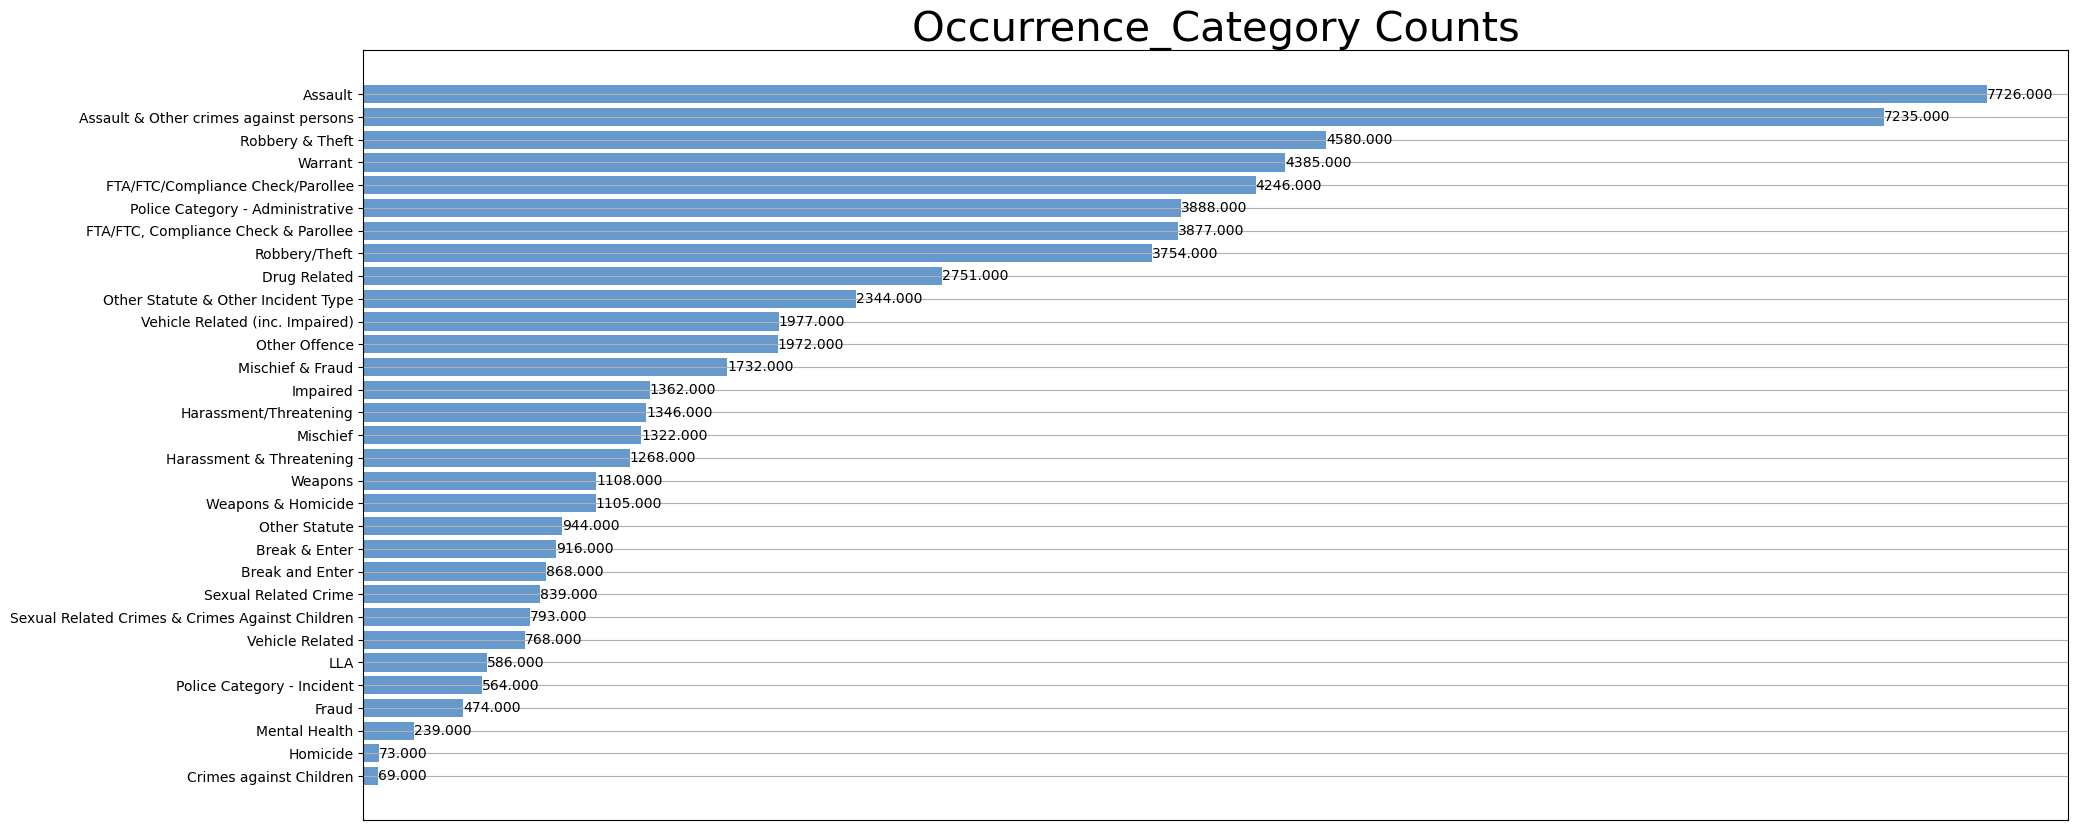

In [14]:
# Analysis of Occurrence_Category
# Count the frequency of unique values
mean_hp = data['Occurrence_Category'].value_counts(ascending=True)
city_name = list(mean_hp.index)
#Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(22,10))
b = ax.barh(range(len(city_name)), mean_hp, color='#6699CC')
 
#Add data labels to the right of horizontal bar chart
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%.3f' %
            round(w,3), ha='left', va='center',fontsize=10)
 
#Set the scale labe on the y axis
ax.set_yticks(range(len(city_name)))
ax.set_yticklabels(city_name,fontsize=10)
 
#Remove all the xticks from x-axis
plt.xticks(())
 
plt.title('Occurrence_Category Counts', loc='center', fontsize='30',
          fontweight='regular', color='black')
plt.grid()
plt.show()
# Assault Category occurs most for 7726 times

In [15]:
# Counting the number of occurences of each arrested age group in the 'Age_group__at_arrest_' column
age = data['Age_group__at_arrest_'].value_counts()

In [16]:
# The aged group 25 to 34 years been arrested most for 20949 times
bar = (
    Bar(init_opts=opts.InitOpts(width="700px", height='300px'))
    .add_xaxis(list(age.index))
    .add_yaxis("Age Group", list(age))
    .set_global_opts(title_opts=opts.TitleOpts(title="Age_group__at_arrest_",subtitle="unit：person"))
)
bar.render_notebook()

In [17]:
# Analysis for Actions at arrest (what actions people took when they are arrested)
actions = ['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__',
           'Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst',
           'Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative']
action = list(map(lambda x:x.split("___")[-1], actions))
action

['Concealed_i',
 'Combative__',
 'Resisted__d',
 'Mental_inst',
 'Assaulted_o',
 'Cooperative']

In [18]:
ac = data[actions]
ac.sum()

Actions_at_arrest___Concealed_i      266
Actions_at_arrest___Combative__     2881
Actions_at_arrest___Resisted__d     2502
Actions_at_arrest___Mental_inst     2179
Actions_at_arrest___Assaulted_o      415
Actions_at_arrest___Cooperative    29109
dtype: int64

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Funnel

v = [266, 2881, 2502, 2179, 415, 29109]
phase = ['Concealed', 'Combative', 'Resisted', 'Mental', 'Assaulted', 'Cooperative']
c = (
    Funnel(init_opts=opts.InitOpts(width="600px", height='300px'))
    .add("Actions_at_arrest", [list(z) for z in zip(phase, v)])
    .set_global_opts(title_opts=opts.TitleOpts(title="")) 
)
c.render_notebook()
# People concealed least when they are arrested

In [20]:
#Extract the values in the 'Age_group__at_arrest_' column of the dataset
data['Age_group__at_arrest_']

0            Aged 35 to 44 years
1            Aged 35 to 44 years
2            Aged 35 to 44 years
3            Aged 25 to 34 years
4            Aged 25 to 34 years
                  ...           
65271        Aged 25 to 34 years
65272        Aged 35 to 44 years
65273        Aged 45 to 54 years
65274    Aged 17 years and under
65275        Aged 18 to 24 years
Name: Age_group__at_arrest_, Length: 65276, dtype: object

In [21]:
# Calculating the correlation coefficients between all pairs of numerical columns in the data
data.corr()

/tmp/ipykernel_177/77856175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
Arrest_Year,1.000000,0.004851,0.000195,-0.002922,-0.311121,-0.029617,-0.008026,-0.003071,0.006184,-0.006909,-0.001037,-0.017286,-0.152009,-0.198695,-0.093682,0.069375,-0.188101,0.060833
EventID,0.004851,1.000000,0.001086,-0.000564,0.004515,0.003574,-0.008544,-0.003417,-0.001590,-0.000763,0.009480,0.002531,-0.017701,-0.002027,-0.007137,0.021897,0.003697,-0.000895
ArrestID,0.000195,0.001086,1.000000,-0.005475,0.003754,0.001884,-0.002743,-0.003507,0.000784,-0.000837,-0.001380,0.001771,0.016809,0.004064,-0.000296,-0.013157,-0.004456,-0.002456
PersonID,-0.002922,-0.000564,-0.005475,1.000000,0.001818,-0.003154,-0.000765,-0.000350,0.003432,0.000238,0.001720,0.000293,-0.005192,-0.002699,0.006726,-0.022030,0.002075,0.002499
StripSearch,-0.311121,0.004515,0.003754,0.001818,1.000000,0.300246,0.060945,0.075347,0.047473,0.087442,0.036486,-0.018694,NaN,NaN,NaN,NaN,NaN,-0.080781
Booked,-0.029617,0.003574,0.001884,-0.003154,0.300246,1.000000,0.036971,0.115742,0.064555,0.096957,0.049537,0.055384,-0.004686,-0.024561,0.014172,0.011585,0.017739,-0.062287
Actions_at_arrest___Concealed_i,-0.008026,-0.008544,-0.002743,-0.000765,0.060945,0.036971,1.000000,0.047136,0.047351,0.037646,0.022113,-0.019167,-0.020898,-0.018271,0.019982,0.048159,0.014269,-0.006164
Actions_at_arrest___Combative__,-0.003071,-0.003417,-0.003507,-0.000350,0.075347,0.115742,0.047136,1.000000,0.249629,0.227052,0.245566,-0.180322,-0.001651,0.013853,0.015889,-0.057889,0.004948,-0.016323
Actions_at_arrest___Resisted__d,0.006184,-0.001590,0.000784,0.003432,0.047473,0.064555,0.047351,0.249629,1.000000,0.116152,0.101491,-0.162412,0.022770,0.035726,0.022166,-0.015080,-0.003918,-0.015673
Actions_at_arrest___Mental_inst,-0.006909,-0.000763,-0.000837,0.000238,0.087442,0.096957,0.037646,0.227052,0.116152,1.000000,0.079560,-0.072867,-0.056003,-0.025974,0.002071,-0.065115,0.029720,-0.017431


/tmp/ipykernel_177/836812562.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


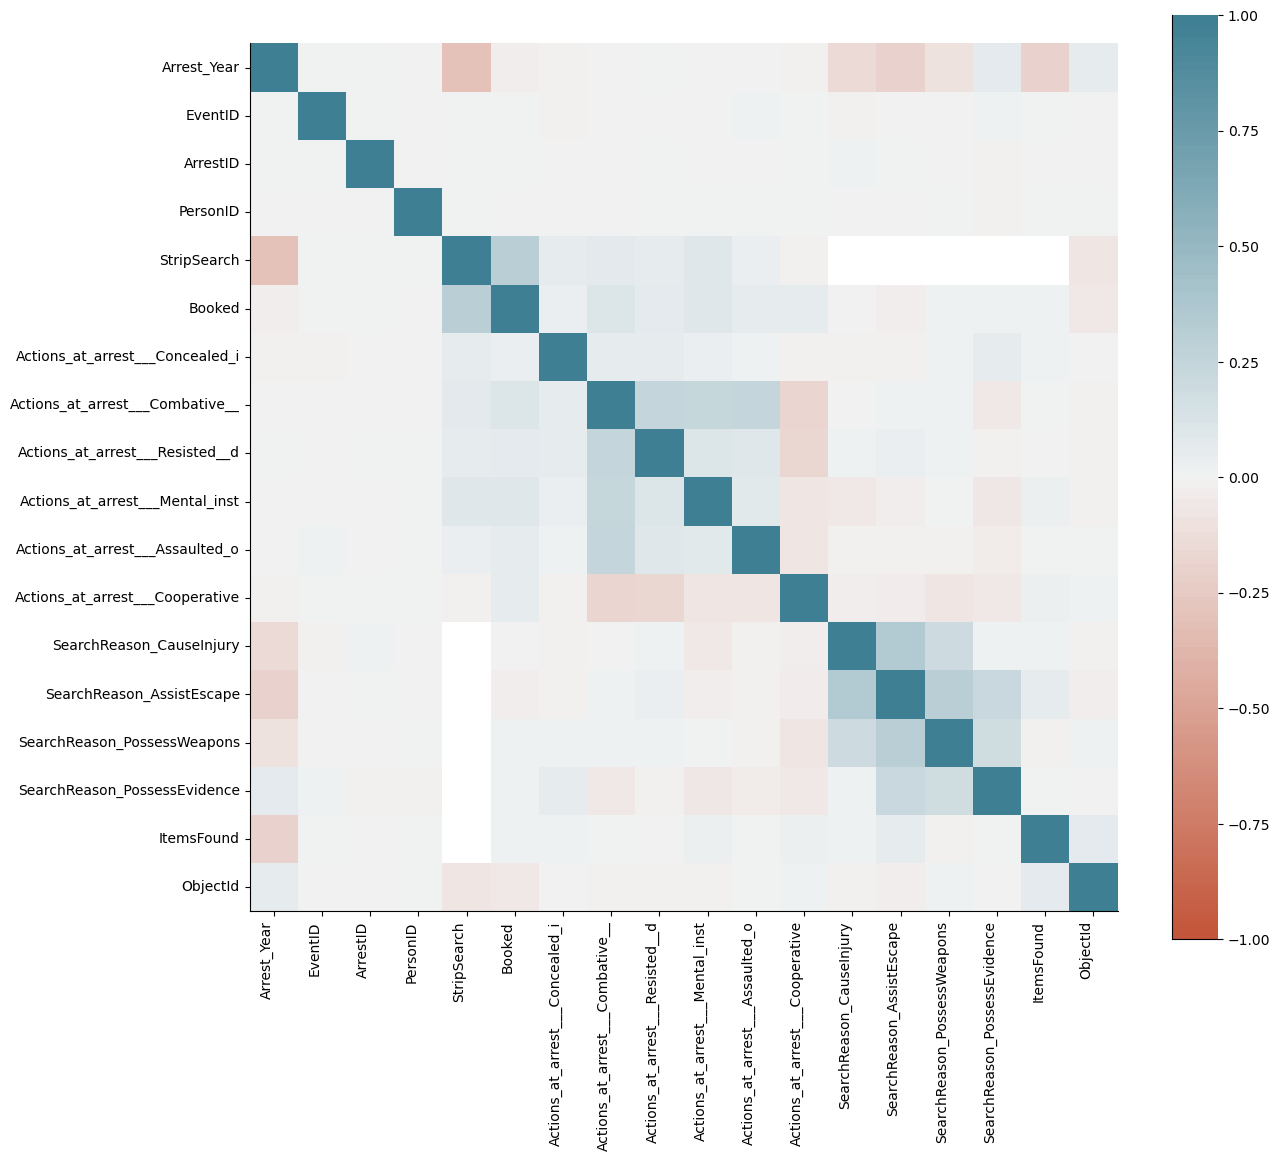

In [22]:
corr = data.corr()
plt.figure(figsize=(14, 12), dpi=100)
ax=sns.heatmap(
    corr,
    annot=False,
    vmin = -1,vmax = 1, center = 0 ,square= True,
    cmap = sns.diverging_palette(20,220,n=200)
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right'
)
sns.despine()
plt.savefig("corr.png")
plt.show()
# StripSearch seems has a strong correlation with Arrest_Year

## T-test

In [23]:
# The age of group people who are arrested 
data['Age_group__at_arrest_']

0            Aged 35 to 44 years
1            Aged 35 to 44 years
2            Aged 35 to 44 years
3            Aged 25 to 34 years
4            Aged 25 to 34 years
                  ...           
65271        Aged 25 to 34 years
65272        Aged 35 to 44 years
65273        Aged 45 to 54 years
65274    Aged 17 years and under
65275        Aged 18 to 24 years
Name: Age_group__at_arrest_, Length: 65276, dtype: object

In [24]:
# Diaplay the sum of the values in the Actions_at_arrest column for each Age_group_at_arrest.
r = data.groupby(by=['Age_group__at_arrest_']).sum()[actions]
r

/tmp/ipykernel_177/757181258.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r = data.groupby(by=['Age_group__at_arrest_']).sum()[actions]


,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
Age_group__at_arrest_,,,,,,
Aged 17 years and under,10,38,51,7,8,621
Aged 17 years and younger,13,29,44,9,3,795
Aged 18 to 24 years,66,391,413,291,89,4418
Aged 25 to 34 years,89,1021,883,811,155,9133
Aged 35 to 44 years,47,799,633,609,95,7215
Aged 45 to 54 years,28,383,305,306,33,4186
Aged 55 to 64 years,11,183,139,116,24,2089
Aged 65 and older,1,20,14,10,1,310
Aged 65 years and older,1,16,18,19,7,335


In [25]:
# Using the NumPy library to convert the pandas dataframe 'r' to a Python list
lst = np.array(r).tolist()
lst

[[10, 38, 51, 7, 8, 621],
 [13, 29, 44, 9, 3, 795],
 [66, 391, 413, 291, 89, 4418],
 [89, 1021, 883, 811, 155, 9133],
 [47, 799, 633, 609, 95, 7215],
 [28, 383, 305, 306, 33, 4186],
 [11, 183, 139, 116, 24, 2089],
 [1, 20, 14, 10, 1, 310],
 [1, 16, 18, 19, 7, 335]]

In [26]:
from scipy.stats import ttest_ind

# Calculate the t-test between two groups, e.g. 'Aged 25 to 34 years' and '35 to 44 years'
group1 = lst[3]  # Aged 25 to 34 years
group2 = lst[4]  # Aged 35 to 44 years
t_stat, p_value = ttest_ind(group1, group2)

# Calculate the standard deviation for each group
std1 = np.std(group1, ddof=1)
std2 = np.std(group2, ddof=1)

# Calculate the mean difference and the standard error
mean_1 = np.mean(group1)
mean_2 = np.mean(group2)
mean_diff = np.mean(group1) - np.mean(group2)
std_error = np.sqrt((std1**2 / len(group1)) + (std2**2 / len(group2)))

# Calculate the confidence interval (CI) for the mean difference
alpha = 0.05  # significance level
df = len(group1) + len(group2) - 2  # degrees of freedom
t_crit = abs(ttest_ind(group1, group2)[0])  # critical t-value
margin_error = t_crit * std_error  # margin of error
CI = mean_diff + np.array([-1, 1]) * margin_error

# Print the results
print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Mean of group 1: {mean_1}")
print(f"Mean of group 2: {mean_2}")
print(f"Standard deviation of group 1: {std1}")
print(f"Standard deviation of group 2: {std2}")
print(f"Mean difference: {mean_diff}")
print(f"Standard error: {std_error}")
print(f"Confidence interval (CI): {CI}")
print(f"Degree Freedom: {df}")

T-test statistic: 0.2455457727474735
P-value: 0.8109998147626681
Mean of group 1: 2015.3333333333333
Mean of group 2: 1566.3333333333333
Standard deviation of group 1: 3508.677110631109
Standard deviation of group 2: 2784.1346710722646
Mean difference: 449.0
Standard error: 1828.579637010346
Confidence interval (CI): [  0. 898.]
Degree Freedom: 10


## Power Analysis

In [27]:
df2 = data[['Age_group__at_arrest_','StripSearch']]
df2

,Age_group__at_arrest_,StripSearch
0,Aged 35 to 44 years,0
1,Aged 35 to 44 years,0
2,Aged 35 to 44 years,0
3,Aged 25 to 34 years,0
4,Aged 25 to 34 years,0
...,...,...
65271,Aged 25 to 34 years,0
65272,Aged 35 to 44 years,0
65273,Aged 45 to 54 years,0
65274,Aged 17 years and under,0


In [28]:
from sklearn.preprocessing import LabelEncoder

relu = []
for col in df2.columns:
    if df2[col].dtype == 'object':
        le = LabelEncoder()
        df2[col] = le.fit_transform(df2[col])
        res = {}
        for cl in le.classes_:
            res.update({cl:le.transform([cl])[0]})
        relu.append(res)
df2.head()

/tmp/ipykernel_177/4256365331.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])


,Age_group__at_arrest_,StripSearch
0,4,0
1,4,0
2,4,0
3,3,0
4,3,0


In [29]:
res 

{'Aged 17 years and under': 0,
 'Aged 17 years and younger': 1,
 'Aged 18 to 24 years': 2,
 'Aged 25 to 34 years': 3,
 'Aged 35 to 44 years': 4,
 'Aged 45 to 54 years': 5,
 'Aged 55 to 64 years': 6,
 'Aged 65 and older': 7,
 'Aged 65 years and older': 8,
 nan: 9}

In [30]:
#Code for Cohen's D 

#Function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #Calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [31]:
# Conduct power analysis 
import numpy as np
from statsmodels.stats.power import TTestIndPower
sample1= df2.loc[df2['StripSearch']==0,:]['Age_group__at_arrest_']
sample2 = df2.loc[df2['StripSearch']==1,:]['Age_group__at_arrest_']
effect_size = Cohens_d(sample1, sample2)
alpha = 0.05
power = 0.8
ratio_ =len(sample1)/len(sample2) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Age group effect on StripSearch:',effect_size)
     

Effect size (Cohen's D) for Age group effect on StripSearch: 0.12076006051423638


In [32]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for NO-StirSearch') 
print('Actual size of NO-StirSearch:', len(sample1))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for StipSearch')
print('Actual size of StripSearch:', len(sample2))

Sample Size of nobs1: 611.502 needed for NO-StirSearch
Actual size of NO-StirSearch: 57475
Sample Size of nobs2: 4505.327 needed for StipSearch
Actual size of StripSearch: 7801


In [33]:
# Another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=57475, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))
     

Power: 1.000


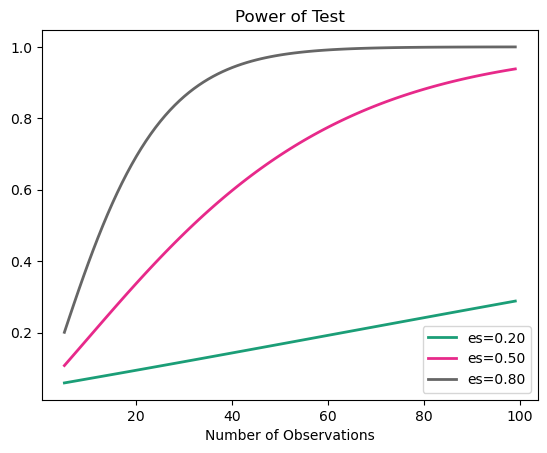

In [34]:
# Lastly power curve

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# Plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

## Ancova

In [35]:
data

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [36]:
data.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [37]:
# Dependent variable: actions taken during the arrest install pingouin
!pip install pingouin
from pingouin import ancova
import numpy as np
a1 = data[['Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative']]
result = a1.idxmax(axis=1)
a2 = list(map(lambda x:x.split("___")[-1], result))
a2 = pd.DataFrame(a2, columns=['actions'])
a2

,actions
0,Cooperative
1,Concealed_i
2,Concealed_i
3,Concealed_i
4,Concealed_i
...,...
65271,Resisted__d
65272,Concealed_i
65273,Concealed_i
65274,Cooperative


In [38]:
# Covirates: “Occurrence Category of the Arrest” and “Individual’s Perceived Race”

a3 = data[['Occurrence_Category','Perceived_Race']]
a3

,Occurrence_Category,Perceived_Race
0,Assault & Other crimes against persons,White
1,Assault & Other crimes against persons,White
2,Assault & Other crimes against persons,Unknown or Legacy
3,Harassment/Threatening,Black
4,FTA/FTC/Compliance Check/Parollee,South Asian
...,...,...
65271,Vehicle Related,Indigenous
65272,Assault,South Asian
65273,Assault,White
65274,Robbery/Theft,Unknown or Legacy


In [39]:
# Between group："Age Group of the Individual at the time of Arrest”
a4 = data['Age_group__at_arrest_']
a4

0            Aged 35 to 44 years
1            Aged 35 to 44 years
2            Aged 35 to 44 years
3            Aged 25 to 34 years
4            Aged 25 to 34 years
                  ...           
65271        Aged 25 to 34 years
65272        Aged 35 to 44 years
65273        Aged 45 to 54 years
65274    Aged 17 years and under
65275        Aged 18 to 24 years
Name: Age_group__at_arrest_, Length: 65276, dtype: object

In [40]:
df2 = pd.concat([a2, a3, a4], axis=1)
df2

,actions,Occurrence_Category,Perceived_Race,Age_group__at_arrest_
0,Cooperative,Assault & Other crimes against persons,White,Aged 35 to 44 years
1,Concealed_i,Assault & Other crimes against persons,White,Aged 35 to 44 years
2,Concealed_i,Assault & Other crimes against persons,Unknown or Legacy,Aged 35 to 44 years
3,Concealed_i,Harassment/Threatening,Black,Aged 25 to 34 years
4,Concealed_i,FTA/FTC/Compliance Check/Parollee,South Asian,Aged 25 to 34 years
...,...,...,...,...
65271,Resisted__d,Vehicle Related,Indigenous,Aged 25 to 34 years
65272,Concealed_i,Assault,South Asian,Aged 35 to 44 years
65273,Concealed_i,Assault,White,Aged 45 to 54 years
65274,Cooperative,Robbery/Theft,Unknown or Legacy,Aged 17 years and under


In [41]:
# LabelEncoder - Occurrence_Category	Perceived_Race
from sklearn.preprocessing import LabelEncoder
relu1 = []
for col in ['actions', 'Occurrence_Category','Perceived_Race']:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})
    relu1.append(res)
df2.head()


,actions,Occurrence_Category,Perceived_Race,Age_group__at_arrest_
0,3,1,7,Aged 35 to 44 years
1,2,1,7,Aged 35 to 44 years
2,2,1,6,Aged 35 to 44 years
3,2,10,0,Aged 25 to 34 years
4,2,7,5,Aged 25 to 34 years


In [42]:
# Mapping Rule
relu1 

[{'Assaulted_o': 0,
  'Combative__': 1,
  'Concealed_i': 2,
  'Cooperative': 3,
  'Mental_inst': 4,
  'Resisted__d': 5},
 {'Assault': 0,
  'Assault & Other crimes against persons': 1,
  'Break & Enter': 2,
  'Break and Enter': 3,
  'Crimes against Children': 4,
  'Drug Related': 5,
  'FTA/FTC, Compliance Check & Parollee': 6,
  'FTA/FTC/Compliance Check/Parollee': 7,
  'Fraud': 8,
  'Harassment & Threatening': 9,
  'Harassment/Threatening': 10,
  'Homicide': 11,
  'Impaired': 12,
  'LLA': 13,
  'Mental Health': 14,
  'Mischief': 15,
  'Mischief & Fraud': 16,
  'Other Offence': 17,
  'Other Statute': 18,
  'Other Statute & Other Incident Type': 19,
  'Police Category - Administrative': 20,
  'Police Category - Incident': 21,
  'Robbery & Theft': 22,
  'Robbery/Theft': 23,
  'Sexual Related Crime': 24,
  'Sexual Related Crimes & Crimes Against Children': 25,
  'Vehicle Related': 26,
  'Vehicle Related (inc. Impaired)': 27,
  'Warrant': 28,
  'Weapons': 29,
  'Weapons & Homicide': 30,
  n

In [43]:
# What is the conditional proability of predicitng y = p(x_1|x_2)
ancova(data=df2, dv='actions', 
       covar=['Occurrence_Category','Perceived_Race'],
       between='Age_group__at_arrest_')

,Source,SS,DF,F,p-unc,np2
0,Age_group__at_arrest_,4.040722,8,0.928888,4.909205e-01,0.000114
1,Occurrence_Category,23.302556,1,42.854644,5.939747e-11,0.000656
2,Perceived_Race,1.209254,1,2.223882,1.358958e-01,0.000034
3,Residual,35475.316635,65241,NaN,NaN,NaN


## Logistic Regression

In [44]:
df=data[['Perceived_Race','StripSearch']]
df

,Perceived_Race,StripSearch
0,White,0
1,White,0
2,Unknown or Legacy,0
3,Black,0
4,South Asian,0
...,...,...
65271,Indigenous,0
65272,South Asian,0
65273,White,0
65274,Unknown or Legacy,0


In [45]:
# Number in different Perceived Race
c1 = df['Perceived_Race'].value_counts()
c1

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

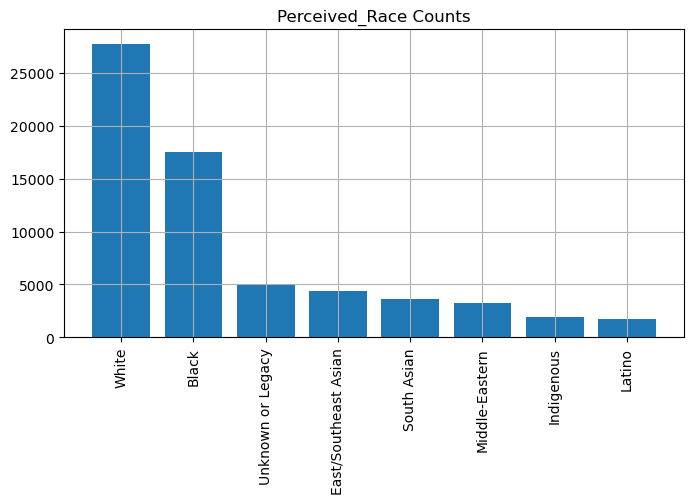

In [46]:
# Distribution in different Perceived_Race
plt.figure(figsize=(8,4), dpi=100)
plt.bar(c1.index.astype(str), c1)
plt.grid()
plt.title("Perceived_Race Counts")
plt.xticks(rotation=90)
plt.show()

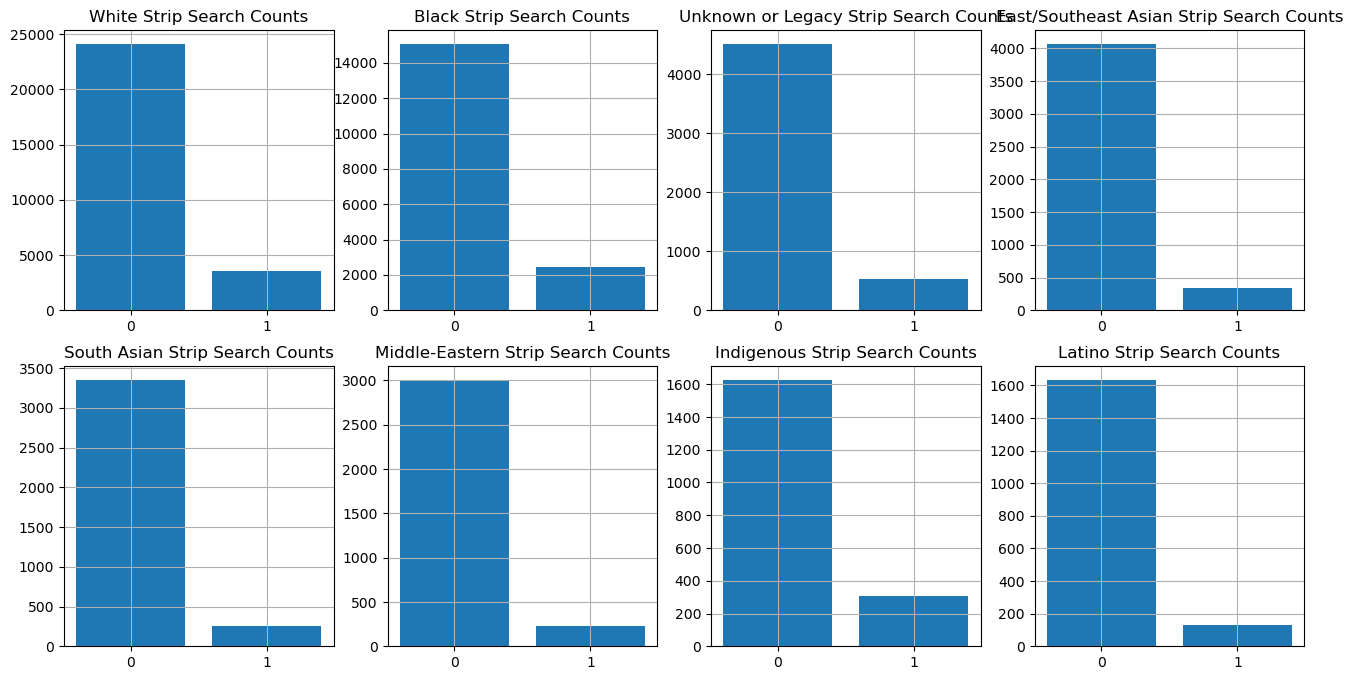

In [47]:
# Distribution of the number of people in different Perceived_Race being searched
plt.figure(figsize=(16,8), dpi=100)
j = 0
for i in c1.index:
    j+=1
    plt.subplot(2,4,j)
    df3 = df.loc[df['Perceived_Race']==i,:]
    c2 = df3['StripSearch'].value_counts()
    plt.bar(c2.index.astype(str), c2)
    plt.grid()
    plt.title(f"{i} Strip Search Counts")
plt.show()

In [48]:
# LabelEncoder of Perceived Race 
# One-hot Encoding
dummies = pd.get_dummies(df['Perceived_Race'])
dummies

,Black,East/Southeast Asian,Indigenous,Latino,Middle-Eastern,South Asian,Unknown or Legacy,White
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
65271,0,0,1,0,0,0,0,0
65272,0,0,0,0,0,1,0,0
65273,0,0,0,0,0,0,0,1
65274,0,0,0,0,0,0,1,0


In [49]:
# Merge with StripSearch
df1 = pd.concat([dummies, df['StripSearch']], axis=1)
df1

,Black,East/Southeast Asian,Indigenous,Latino,Middle-Eastern,South Asian,Unknown or Legacy,White,StripSearch
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
65271,0,0,1,0,0,0,0,0,0
65272,0,0,0,0,0,1,0,0,0
65273,0,0,0,0,0,0,0,1,0
65274,0,0,0,0,0,0,1,0,0


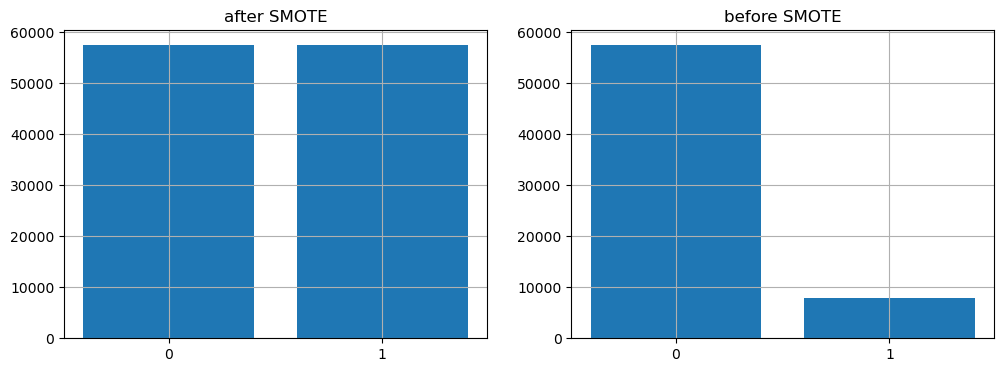

In [50]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
seed =2023
X, y = df1.drop(['StripSearch'], axis=1), df1['StripSearch'].astype(str)
# Random divide tranining and testing

smote_X, smote_y = SMOTE().fit_resample(X, y)

# Upsampling of training data
# Visuliazing sampling results through bar chart 
plt.figure(figsize=(12,4),dpi=100)
plt.subplot(1,2,1)
plt.bar(dict(Counter(smote_y)).keys(),dict(Counter(smote_y)).values())
plt.grid()
plt.title("after SMOTE")
plt.subplot(1,2,2)
plt.bar(dict(Counter(y)).keys(), dict(Counter(y)).values())
plt.title("before SMOTE")
plt.grid()
plt.show()
#Balanced

In [51]:
# Logistic model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(smote_X, smote_y,
                                                   test_size=0.2, random_state=seed)
model = LogisticRegression(penalty='l2', max_iter=1000)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('accuracy:', accuracy)

accuracy: 0.5499782514136581


In [52]:
# 55% Accuracy
model.intercept_ 
# Intercept

array([-0.00344027])

In [53]:
# Weight coefficients for each race on logistic regression
model.coef_[0]

array([ 0.16577963, -0.415925  ,  0.3514594 , -0.48175267, -0.56853519,
       -0.53834525, -0.14738541,  0.0853484 ])

In [54]:
odds_ratios = np.exp(model.coef_[0])

# Print odds ratios for each feature
for feature, odds_ratio in zip(X.columns, odds_ratios):
    print(f"{feature}: {odds_ratio:.4f}")

Black: 1.1803
East/Southeast Asian: 0.6597
Indigenous: 1.4211
Latino: 0.6177
Middle-Eastern: 0.5664
South Asian: 0.5837
Unknown or Legacy: 0.8630
White: 1.0891


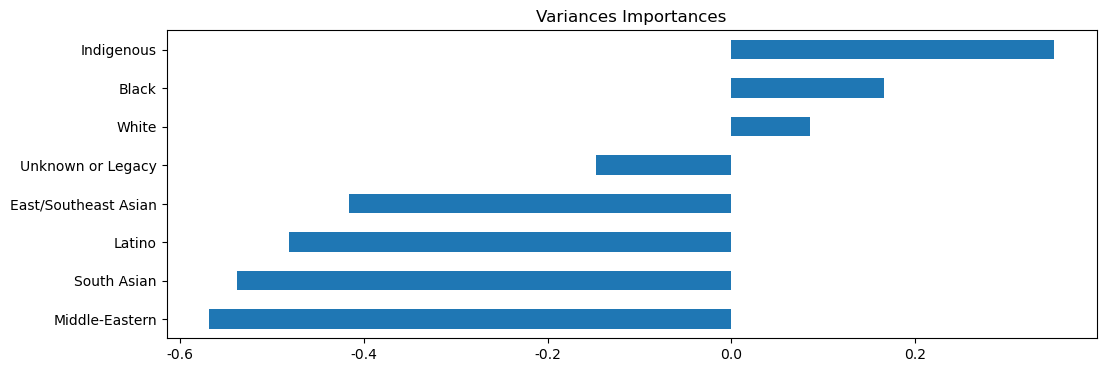

In [55]:
# Variance Importance visulation 
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False # Displays negative sign

# Simple sorting， the positive and negative are seperated in order 
coef_LR = pd.Series(model.coef_.flatten(),index = X.columns,name = 'Var')

plt.figure(figsize=(12,4), dpi=100)
coef_LR.sort_values().plot(kind='barh')
plt.title("Variances Importances")
plt.show()

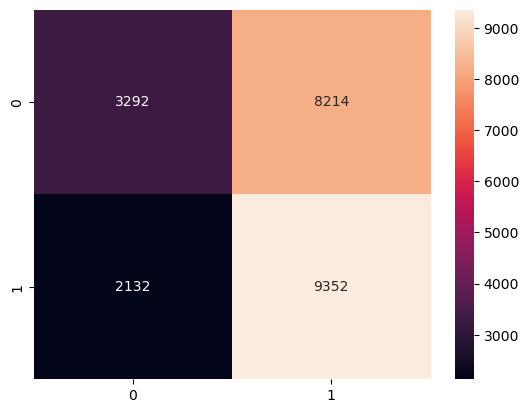

In [56]:
# Confusion Matrix
mat = confusion_matrix(y_test, pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat, annot=True, fmt='.20g')
plt.show()